In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [35]:
#from google.colab import drive
#drive.mount('/content/drive')

In [36]:
A=pd.read_csv('car_sales.csv',index_col=0)
A.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [37]:
A.shape

(93, 27)

In [38]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [39]:
#A=A.drop('Manufacturer','Model','Make','',axis=1)

In [40]:
A.shape

(93, 27)

In [41]:
A.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


In [42]:
A['AirBags'].value_counts()

Driver only           43
None                  34
Driver & Passenger    16
Name: AirBags, dtype: int64

In [43]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [44]:
A.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


In [45]:
A['Make'].value_counts()

Acura Integra               1
Mercury Capri               1
Oldsmobile Cutlass_Ciera    1
Oldsmobile Achieva          1
Nissan Maxima               1
                           ..
Eagle Vision                1
Eagle Summit                1
Dodge Stealth               1
Dodge Dynasty               1
Volvo 850                   1
Name: Make, Length: 93, dtype: int64

<AxesSubplot:title={'center':'Price'}, xlabel='Passengers'>

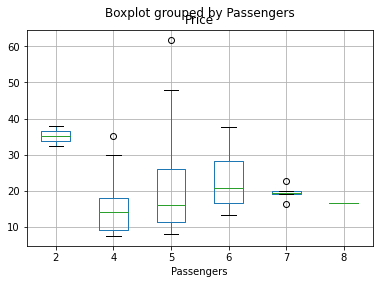

In [46]:
A.boxplot(column='Price',by='Passengers')

<AxesSubplot:title={'center':'Price'}, xlabel='Cylinders'>

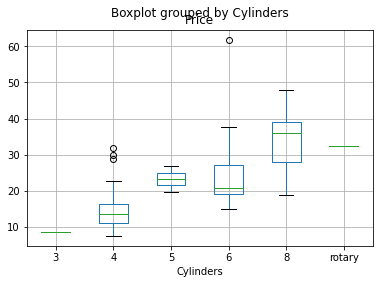

In [47]:
A.boxplot(column='Price',by='Cylinders')

<AxesSubplot:title={'center':'Price'}, xlabel='Origin'>

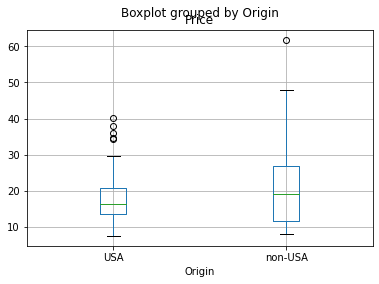

In [48]:
A.boxplot(column='Price',by='Origin')

<AxesSubplot:title={'center':'Price'}, xlabel='AirBags'>

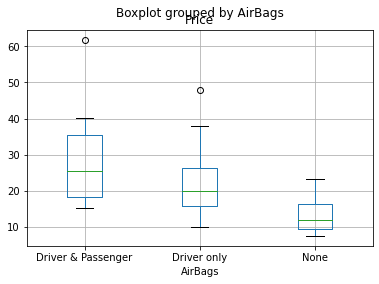

In [49]:
A.boxplot(column='Price',by='AirBags')

In [50]:
A['Man.trans.avail'].value_counts()

Yes    61
No     32
Name: Man.trans.avail, dtype: int64

<AxesSubplot:title={'center':'Price'}, xlabel='Man.trans.avail'>

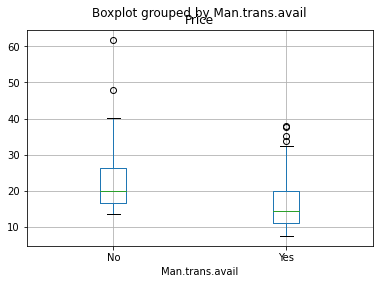

In [51]:
A.boxplot(column='Price',by='Man.trans.avail')

<AxesSubplot:title={'center':'Price'}, xlabel='DriveTrain'>

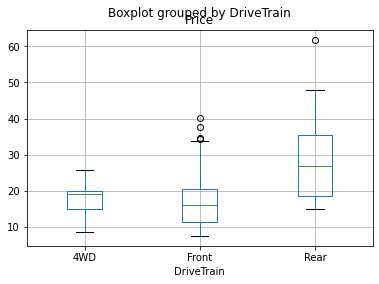

In [52]:
A.boxplot(column='Price',by='DriveTrain')

<AxesSubplot:title={'center':'Price'}, xlabel='Man.trans.avail'>

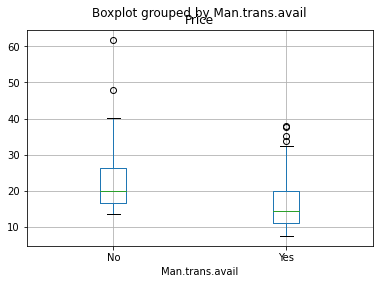

In [53]:
A.boxplot(column='Price',by='Man.trans.avail')

<AxesSubplot:title={'center':'Price'}, xlabel='AirBags'>

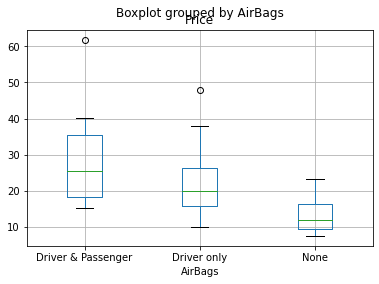

In [54]:
A.boxplot(column='Price',by='AirBags')

In [55]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [56]:
A['Passengers']=A['Passengers'].astype('object')

In [57]:
#Bigdata (10K to 100K) = dropna
#Dataset size (500-2000)upto 5-10% of size of n = Median Imputation or random sampling
#Dataset around 1000, 10-20% of record is missing = KNN Imputer (preserve your distribution)

In [58]:
A['Rear.seat.room'].fillna(A['Rear.seat.room'].median(),inplace=True)
A['Luggage.room'].fillna(A['Luggage.room'].median(),inplace=True)

In [59]:
test=pd.DataFrame({'x1':[3,8,np.nan,5,10],'x2':[5,2,7,8,9],'x3':[np.nan,9,8,2,5]})
test

,x1,x2,x3
0,3.0,5,NaN
1,8.0,2,9.0
2,NaN,7,8.0
3,5.0,8,2.0
4,10.0,9,5.0


In [60]:
from sklearn.impute import KNNImputer
#by default it is recursive

In [61]:
Imp=KNNImputer(n_neighbors=2)
Imp.fit_transform(test)

array([[ 3. ,  5. ,  5. ],
       [ 8. ,  2. ,  9. ],
       [ 6.5,  7. ,  8. ],
       [ 5. ,  8. ,  2. ],
       [10. ,  9. ,  5. ]])

In [62]:
#using KNN imputer (n_neigh=2)
#test-1=8
#test-3=5
#test-4=11

In [63]:
B.shape

(93, 22)

In [64]:
#Create a B data frame by dropping unwanted columns based on business context
B=A.drop(['Manufacturer','Model','Min.Price','Max.Price','Make'],axis=1)
B.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
1,Small,15.9,25,31,None,Front,4,1.8,140,6300,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
2,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
3,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
4,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
5,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [65]:
B.shape

(93, 22)

In [66]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                93 non-null     object 
 1   Price               93 non-null     float64
 2   MPG.city            93 non-null     int64  
 3   MPG.highway         93 non-null     int64  
 4   AirBags             93 non-null     object 
 5   DriveTrain          93 non-null     object 
 6   Cylinders           93 non-null     object 
 7   EngineSize          93 non-null     float64
 8   Horsepower          93 non-null     int64  
 9   RPM                 93 non-null     int64  
 10  Rev.per.mile        93 non-null     int64  
 11  Man.trans.avail     93 non-null     object 
 12  Fuel.tank.capacity  93 non-null     float64
 13  Passengers          93 non-null     object 
 14  Length              93 non-null     int64  
 15  Wheelbase           93 non-null     int64  
 16  Width     

In [67]:
df_cat = B.select_dtypes(include=[np.object])

# display categorical features
df_cat.columns

C:\Users\yaman\AppData\Local\Temp/ipykernel_12692/1772016445.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat = B.select_dtypes(include=[np.object])


Index(['Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail',
       'Passengers', 'Origin'],
      dtype='object')

In [68]:
B.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
1,Small,15.9,25,31,None,Front,4,1.8,140,6300,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
2,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
3,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
4,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
5,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [69]:
dummy_var = pd.get_dummies(data = df_cat, drop_first=True)
dummy_var.shape

(93, 21)

In [70]:
dummy_var.head()

,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,...,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
1,0,0,1,0,0,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
3,0,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
5,0,1,0,0,0,1,0,0,1,1,...,0,0,0,1,1,0,0,0,0,1


In [71]:
B['Type'].value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

In [72]:
X=B.drop('Price',axis=1)
X.shape

(93, 21)

In [73]:
df_num = B.select_dtypes(include=[np.number])
df_num.shape

(93, 15)

In [74]:
X_final = pd.concat([df_num, dummy_var], axis=1)

# display first five observations
X_final.shape

(93, 36)

In [75]:
Y=B['Price']
Y.shape

(93,)

In [76]:
X_final=X_final.drop('Price',axis=1)

In [77]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [78]:
Xc = sm.add_constant(X_final)
model = sm.OLS(Y,Xc).fit()
model.summary()    

C:\Users\yaman\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     10.06
Date:                Fri, 06 May 2022   Prob (F-statistic):           2.77e-14
Time:                        14:41:59   Log-Likelihood:                -252.59
No. Observations:                  93   AIC:                             575.2
Df Residuals:                      58   BIC:                             663.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 110.8270     35.770      3.098      0.003      39.226     182.428
MPG.city               -0.3244      0.432     -0.750      0.456      -1.190       0.541
MPG.highway             0.1691      0.398      0.425      0.672      -0.627       0.965
EngineSize             -1.6774      2.828     -0.593      0.555      -7.337       3.983
Horsepower              0.1388      0.045      3.088      0.003       0.049       0.229
RPM                    -0.0026      0.002     -1.169      0.247      -0.007       0.002
Rev.per.mile            0.0017      0.002      0.771      0.444      -0.003       0.006
Fuel.tank.capacity      0.4672      0.540      0.865      0.391      -0.614       1.549
Length                  0.0485      0.110      0.443      0.660      -0.171       0.268
Wheelbase               0.3850      0.274      1.407      0.165      -0.163       0.933
Width                  -1.9087      0.544     -3.511      0.001      -2.997      -0.820
Turn.circle            -0.6224      0.365     -1.703      0.094      -1.354       0.109
Rear.seat.room          0.3343      0.359      0.932      0.355      -0.384       1.053
Luggage.room            0.2737      0.339      0.808      0.423      -0.405       0.952
Weight                 -0.0013      0.006     -0.237      0.813      -0.013       0.010
Type_Large              1.5368      4.227      0.364      0.718      -6.925       9.999
Type_Midsize            3.9322      2.457      1.601      0.115      -0.986       8.850
Type_Small              1.1903      2.657      0.448      0.656      -4.129       6.509
Type_Sporty             6.5059      3.371      1.930      0.059      -0.242      13.254
Type_Van                3.6835      7.196      0.512      0.611     -10.722      18.089
AirBags_Driver only    -3.7364      1.897     -1.970      0.054      -7.533       0.060
AirBags_None           -8.3008      2.181     -3.806      0.000     -12.666      -3.936
DriveTrain_Front        2.2805      2.297      0.993      0.325      -2.318       6.879
DriveTrain_Rear         7.2573      2.915      2.490      0.016       1.423      13.092
Cylinders_4            -2.1621      4.446     -0.486      0.629     -11.061       6.737
Cylinders_5            -3.5966      6.722     -0.535      0.595     -17.052       9.859
Cylinders_6             0.8184      5.614      0.146      0.885     -10.419      12.056
Cylinders_8             3.4500      6.832      0.505      0.616     -10.226      17.126
Cylinders_rotary      -15.0831     12.735     -1.184      0.241     -40.576      10.410
Man.trans.avail_Yes    -1.9656      2.167     -0.907      0.368      -6.303       2.372
Passengers_4           -5.4956      7.065     -0.778      0.440     -19.638       8.646
Passengers_5           -2.3710      7.490     -0.317      0.753     -17.363      12.621
Pas

In [79]:
R=pd.DataFrame(model.resid)
R[0].skew()

0.6387260851965743

In [80]:
p = pd.Series(model.pvalues.values[1:],index = X_final.columns)      
pmax = max(p)
feature_with_p_max = p.idxmax()
print(pmax)
print(feature_with_p_max)

0.9416850917337998
Passengers_7


In [81]:
#Feature Selection by Recursive Backward Elimination
cols=list(X_final.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_final = X_final[cols]
    Xc = sm.add_constant(X_final)
    model_full = sm.OLS(Y,Xc).fit()
    p = pd.Series(model_full.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols


C:\Users\yaman\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\yaman\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\yaman\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\yaman\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\yaman\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin

In [82]:
print(selected_features)

['Horsepower', 'Fuel.tank.capacity', 'Wheelbase', 'Width', 'Type_Midsize', 'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Rear']


In [83]:
X_new=X_final[selected_features]
X_new.shape

(93, 8)

In [84]:
X_new.columns

Index(['Horsepower', 'Fuel.tank.capacity', 'Wheelbase', 'Width',
       'Type_Midsize', 'AirBags_Driver only', 'AirBags_None',
       'DriveTrain_Rear'],
      dtype='object')

In [85]:
X_new_c=sm.add_constant(X_new)

C:\Users\yaman\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [86]:
model2=sm.OLS(Y,X_new_c).fit()

In [87]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     40.08
Date:                Fri, 06 May 2022   Prob (F-statistic):           1.51e-25
Time:                        14:41:59   Log-Likelihood:                -269.27
No. Observations:                  93   AIC:                             556.5
Df Residuals:                      84   BIC:                             579.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  45.2793     13.385      3.383      0.001      18.662      71.897
Horsepower              0.1137      0.015      7.468      0.000       0.083       0.144
Fuel.tank.capacity      0.6133      0.305      2.011      0.047       0.007       1.220
Wheelbase               0.4644      0.135      3.430      0.001       0.195       0.734
Width                  -1.4171      0.268     -5.283      0.000      -1.951      -0.884
Type_Midsize            2.8692      1.244      2.307      0.024       0.396       5.342
AirBags_Driver only    -3.3025      1.435     -2.301      0.024      -6.157      -0.448
AirBags_None           -6.1950      1.680     -3.687      0.000      -9.536      -2.854
DriveTrain_Rear         4.6664      1.420      3.286      0.001       1.842       7.491
==============================================================================
Omnibus:                       25.799   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.756
Skew:                           0.968   Prob(JB):                     6.41e-14
Kurtosis:                       6.454   Cond. No.                     5.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics

In [89]:
LR=LinearRegression()

In [90]:
xtrain,xtest,ytrain,ytest=train_test_split(X_new,Y,test_size=.3,random_state=0)

In [91]:
LR.fit(xtrain,ytrain)
y_pred_test=LR.predict(xtest)
mse=metrics.mean_squared_error(ytest,y_pred_test)
rmse_test=np.sqrt(mse)
print(rmse_test)

4.418244915318324


In [92]:
y_pred_train=LR.predict(xtrain)
mse=metrics.mean_squared_error(ytrain,y_pred_train)
rmse_train=np.sqrt(mse)
print(rmse_train)

4.512824771597362


In [93]:
#since testrmse>trainrmse, slightly model overfits

In [94]:
#k-fold cross validation

In [95]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
scores=cross_val_score(LR,X_new,Y,cv=kf,scoring='neg_root_mean_squared_error')
print(scores)

[-4.20230012 -4.84075167 -6.15252864]


In [96]:
print('Bias_Error',np.mean(np.abs(scores)))
print('Variance_Error',np.std(np.abs(scores),ddof=1))

Bias_Error 5.065193476244539
Variance_Error 0.994297948644457


In [97]:
X_new['Horsepower'].std()

52.37440954443844

In [98]:
np.std(X_new['Horsepower'],ddof=1)

52.37440954443844

In [99]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
rmse=cross_val_score(LR,X_new,Y,cv=kf,scoring='neg_root_mean_squared_error')
LR_be=np.mean(np.abs(rmse))
LR_ve=np.std(np.abs(rmse),ddof=1)
print('Bias_Error',LR_be)
print('VAR_Error',LR_ve)

Bias_Error 5.065193476244539
VAR_Error 0.994297948644457


In [100]:
rmse

array([-4.20230012, -4.84075167, -6.15252864])

In [101]:
X_new['Horsepower'].std()

52.37440954443844

In [102]:
np.std(X_new['Horsepower'],ddof=1)

52.37440954443844

In [103]:
xtrain,xtest,ytrain,ytest=train_test_split(X_new,Y,test_size=0.3,random_state=0)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((65, 8), (28, 8), (65,), (28,))

In [104]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics

In [105]:
LR=LinearRegression()
LR.fit(xtrain,ytrain)
y_pred_test=LR.predict(xtest)
y_pred_test

array([23.27062614,  5.29583001, 17.31564193, 13.25077206, 21.58900715,
       33.47719517,  8.39321181, 10.02622304, 19.9748852 , 18.56696543,
       10.57714122, 25.02335049, 34.00345247, 24.5817835 , 10.30048889,
       11.9976426 , 22.14282241,  9.86697138, 17.37021062, 30.76890986,
       17.54220178, 27.03894636, 14.684678  , 18.2385048 , 14.08399776,
        8.97462831, 14.35418502, 25.65838186])

In [106]:
#RMSE for test record
mse_test=metrics.mean_squared_error(ytest,y_pred_test)
rmse_test=np.sqrt(mse_test)
print(rmse_test)

4.418244915318324


In [107]:
y_pred_train=LR.predict(xtrain)
#RMSE for train record
mse_train=metrics.mean_squared_error(ytrain,y_pred_train)
rmse_train=np.sqrt(mse_train)
print(rmse_train)

4.512824771597362


In [108]:
LR=LinearRegression()
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=3,shuffle=True,random_state=0) #explicit definition
mse=cross_val_score(LR,X_new,Y,cv=kf,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(mse))
rmse_avg=np.mean(rmse)
rmse_sd=np.std(rmse,ddof=1)
print('Bias_Error',rmse_avg)
print('Var_Error',rmse_sd)

Bias_Error 5.065193476244539
Var_Error 0.994297948644457


In [109]:
rmse

array([4.20230012, 4.84075167, 6.15252864])